# Electricity Demand Forecasting


In [194]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [195]:
# import dataset
data = pd.read_csv("electricity demand dataset.csv")

In [196]:
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [197]:
# check some basic information about  the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [198]:
# check the column datatype to datatime format
data['Timestamp']=pd.to_datetime(data['Timestamp'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12972\936446924.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp']=pd.to_datetime(data['Timestamp'])


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


In [200]:
# set the datetime column as Dataframe's index
data = data.set_index('Timestamp')

In [201]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [202]:
# using describe function to check the summary statistics
data[['Temperature','Humidity','Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [203]:
# check for missing values
data.isnull().sum()

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [204]:
# to show the records that contain any null values
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [205]:
# to show the records that contain all null values
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
# drop those rows that contain all missing values
data.dropna(how='all')

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [207]:
# Forward fill
data[['hour','dayofweek','month','year','dayofyear']]=data[['hour','dayofweek','month','year','dayofyear']].ffill()

In [208]:
# Backward fill
data[['Temperature','Humidity']]=data[['Temperature','Humidity']].bfill()

In [209]:
data['Demand']=data['Demand'].interpolate(method='time')

In [210]:
# shape of dataframe
data.shape

(43848, 8)

In [211]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


## Feature Engineering

In [212]:
# create the 'Quarter' column in the dataset
data.insert(5,'quarter',data.index.quarter)
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,4,3.000000,40.565916,4015.979957


In [213]:
# convert the datastype from float to integer
data[['hour','dayofweek','month','year','dayofyear']]=data[['hour','dayofweek','month','year','dayofyear']].astype(int)

In [214]:
# create the 'Week of Year' column in the dataset
data.insert(5, 'weekofyear',data.index.isocalendar().week.astype(int))

In [215]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,3.000000,40.565916,4015.979957


In [216]:
# create a new column to check the weekend
data.insert(7, 'is_weekend',data.index.dayofweek.isin([5,6]))

In [217]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,False,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,False,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,False,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,False,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,False,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,False,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,False,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,False,3.000000,40.565916,4015.979957


In [218]:
data['is_weekend'] = data['is_weekend'].astype(int)

In [219]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957


In [220]:
# lagged features: These are the past values of a time series data
# Use - Past demand values are strong predictors.They can be used as input to predict future values.

In [221]:
# Demand from the same hour yesterday,same hour last week
data['Demand_lag_24hrs']=data['Demand'].shift(24)

In [222]:
data['Demand_lag_168hrs']=data['Demand'].shift(168)

In [223]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs
Timestamp,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014


In [224]:
data.iloc[168:200]

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs
Timestamp,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006
2020-01-08,5,2,1,2020,8,2,1,0,11.228013,73.962977,3372.983284,3113.810048,3104.845505
2020-01-08,6,2,1,2020,8,2,1,0,7.224730,71.773393,3638.748816,3794.729270,3759.476912
2020-01-08,7,2,1,2020,8,2,1,0,17.710862,48.828914,4650.003446,4285.030093,4114.486001
2020-01-08,8,2,1,2020,8,2,1,0,14.323524,68.049498,4580.866193,4470.762678,4575.159503


In [225]:
# Rolling mean & Rolling standard deviation
data['demand_rolling_mean_24hr'] = data['Demand'].rolling(window=24).mean()

In [226]:
data['demand_rolling_std_24hr'] = data['Demand'].rolling(window=24).std()

In [227]:
data.head(27)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN,NaN,NaN


In [228]:
# drop all rows having null values
data=data.dropna()

In [229]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


## Data Visualization

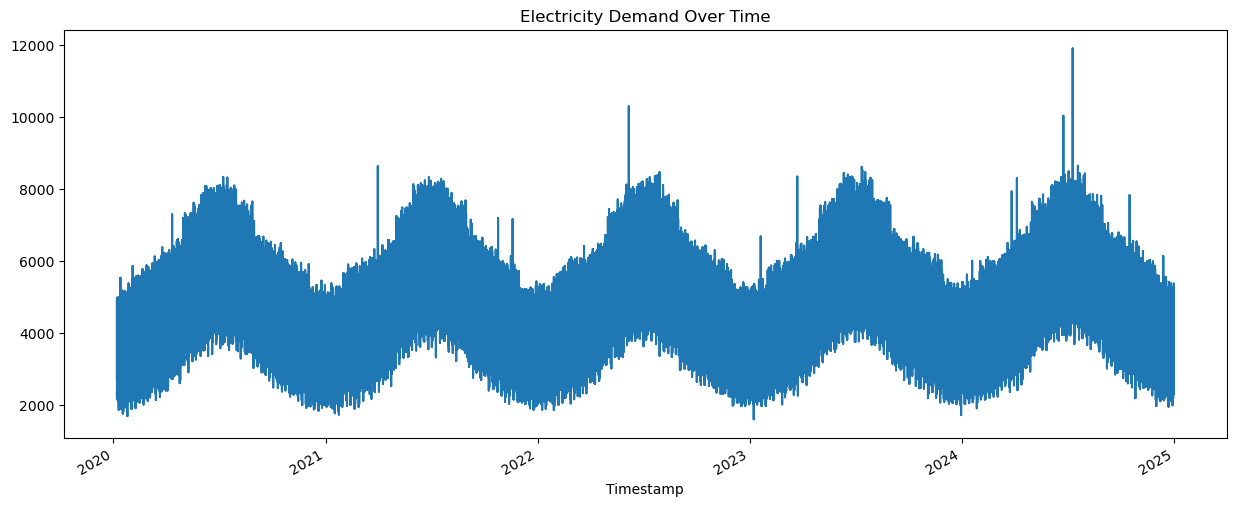

In [230]:
# plot raw demand over time
data['Demand'].plot(figsize=(15,6), title='Electricity Demand Over Time')
plt.show()

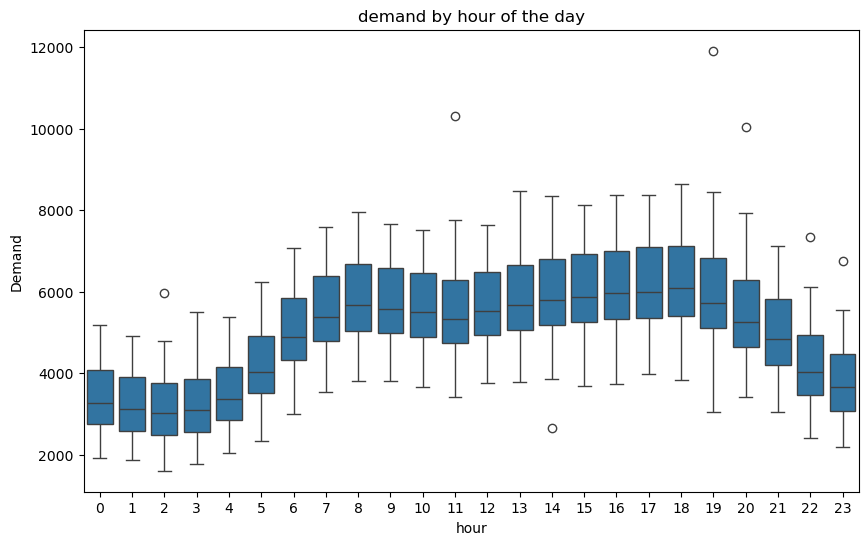

In [231]:
# Visualize demand by hour of day
plt.figure(figsize =(10,6))
sns.boxplot(data = data,x = 'hour', y = 'Demand')
plt.title("demand by hour of the day")
plt.show()

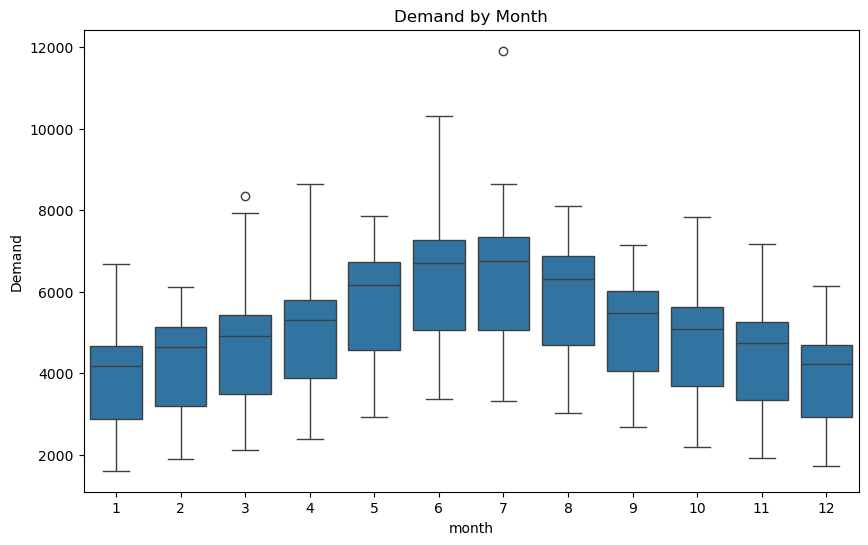

In [232]:
# Visualize demand by month
plt.figure(figsize=(10,6))
sns.boxplot(data = data, x = 'month', y = 'Demand')
plt.title("Demand by Month")
plt.show()

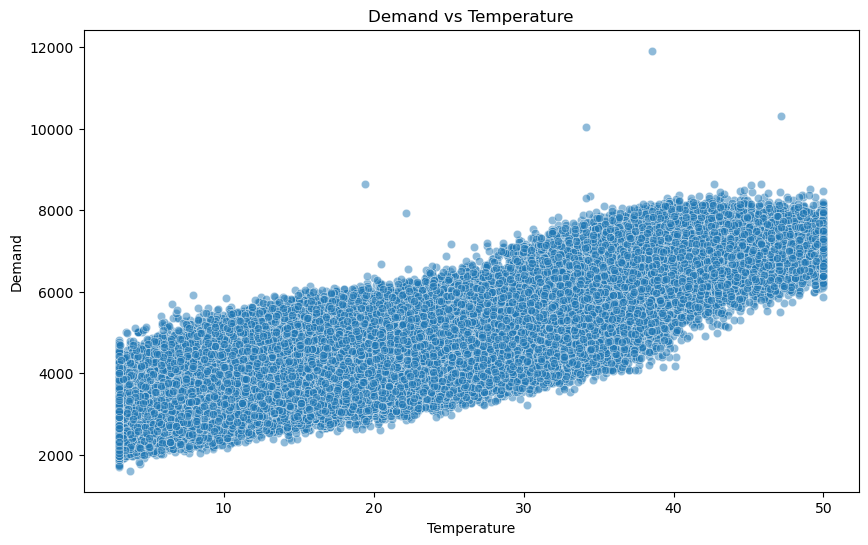

In [233]:
# Scatter plot of Demand vs Temperature
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x= 'Temperature', y= 'Demand', alpha = 0.5)
plt.title("Demand vs Temperature")
plt.show()

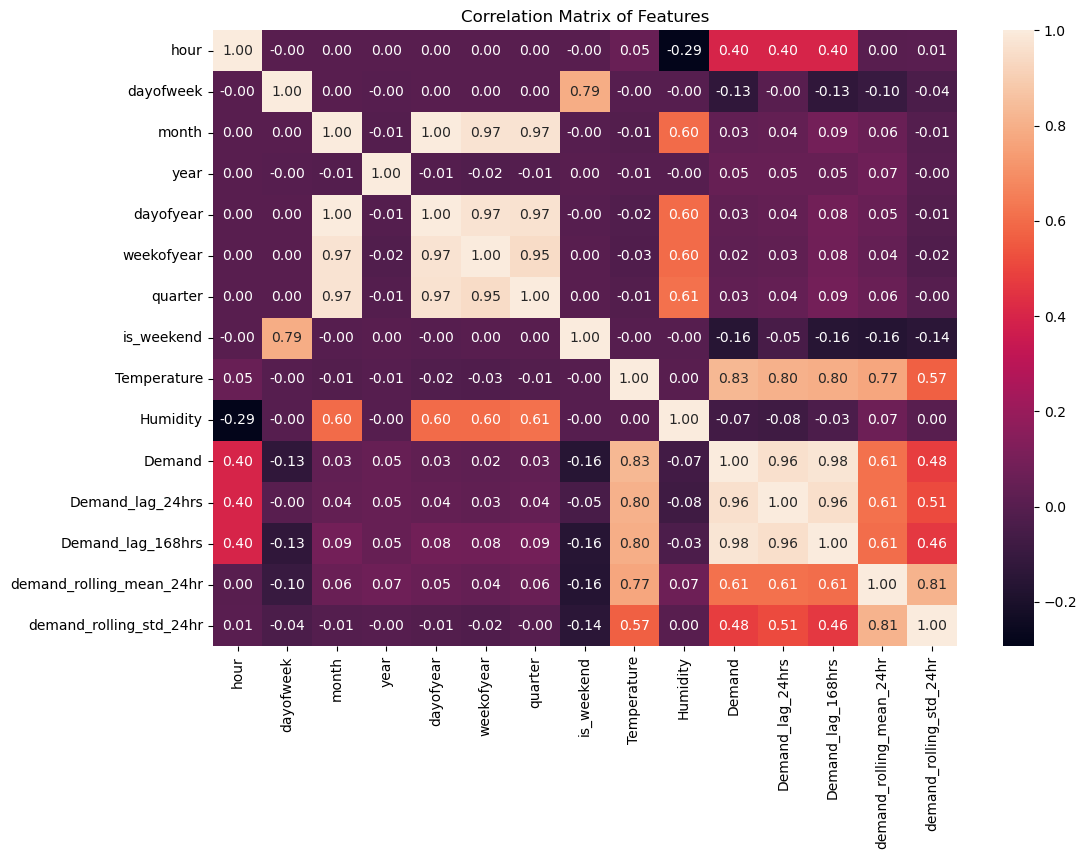

In [234]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, fmt= ".2f")
plt.title("Correlation Matrix of Features")
plt.show()

## Machine Learning 

In [235]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


In [236]:
# defining target variable (Y)
Y = data.Demand                           # target variable

In [237]:
Y

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 43680, dtype: float64

In [238]:
# defining independent variable (x)
X = data.drop('Demand', axis=1)          # independent variable

In [239]:
X

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [240]:
# Splitting the data into training and testing data
X_train = X.loc[: '2023-12-31']                            # taking 80% of data as testing data

In [241]:
X_train

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,6,12,2023,365,52,4,1,6.721774,46.627264,3894.908251,3840.654680,3597.790591,879.089476
2023-12-31,20,6,12,2023,365,52,4,1,7.557696,58.505012,3797.287793,4122.218903,3599.126925,879.430235
2023-12-31,21,6,12,2023,365,52,4,1,3.000000,48.001079,3280.602315,3307.887152,3604.785551,877.726873


In [242]:
Y_train = Y.loc[: '2023-12-31']                      # taking 80% of data as training data

In [243]:
Y_train

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2023-12-31    4185.721624
2023-12-31    3829.359810
2023-12-31    3416.409325
2023-12-31    3188.143951
2023-12-31    2631.860751
Name: Demand, Length: 34896, dtype: float64

In [244]:
X_test = X.loc['2024-01-01' :]                      # taking 20% of data as testing data

In [245]:
X_test

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hrs,Demand_lag_168hrs,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2024-01-01,0,0,1,2024,1,1,1,0,3.000000,65.297046,2373.967493,2752.003113,3626.185642,856.204515
2024-01-01,1,0,1,2024,1,1,1,0,3.000000,69.068654,2328.972904,2419.747602,3640.380403,836.357296
2024-01-01,2,0,1,2024,1,1,1,0,3.000000,80.885372,1729.176090,2292.834087,3669.813854,776.458065
2024-01-01,3,0,1,2024,1,1,1,0,7.788675,66.501527,2257.337352,2507.704476,3685.801618,749.595470
2024-01-01,4,0,1,2024,1,1,1,0,6.607828,57.858109,2516.948873,2690.933257,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [246]:
Y_test = Y.loc['2024-01-01' :]                      # taking 20% of data as testing data

In [247]:
Y_test

Timestamp
2024-01-01    2720.606072
2024-01-01    2669.647167
2024-01-01    2435.578924
2024-01-01    2641.043699
2024-01-01    2687.949643
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 8784, dtype: float64

In [248]:
print (X_train.shape)
print (Y_train.shape)

(34896, 14)
(34896,)


In [249]:
print(X_test.shape)
print(Y_test.shape)

(8784, 14)
(8784,)


## XGBoost

In [250]:
from xgboost import XGBRegressor            # from XGBoost library we are importing XGBRegressor class

# from sklearn library importing two fundamental metrics to evaluate the performance of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# from model_selection module of scikit-learn's library, import TimeSeriesSplit class
# TimeSeriesSplit class perform appropriate cross validation when dealing with time series data
from sklearn.model_selection import TimeSeriesSplit

In [251]:
# Initialize and the final the model

model_xgb = XGBRegressor(n_estimators = 1000,
                        early_stopping_rounds = 50,
                        learning_rate = 0.01,
                        random_state =42,
                        objective = 'reg:squarederror')

 In short:
The XGBReggressor initailiztion creates a model that will train for up tp 1000 boosting rounds (trees)but will stop early if performance on a validation set doesn't improve for 50 consecutive rounds.

Each tree's contribution is scaled down by a learning rate of 0.01 to prevent overfitting.

This model is designed to minimize the squared error for regression taskes

In [252]:
model_xgb.fit(X_train, Y_train, eval_set = [(X_train, Y_train),(X_test, Y_test)],verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [253]:
# Make predication
predictions_xgb = model_xgb.predict(X_test)

In [254]:
# Evaluating the model

rmse_xgb = np.sqrt(mean_squared_error(Y_test, predictions_xgb))
mae_xgb = mean_absolute_error(Y_test, predictions_xgb)

In [255]:
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost MAE:", mae_xgb)

XGBoost RMSE: 175.15009325383122
XGBoost MAE: 124.00679622415312


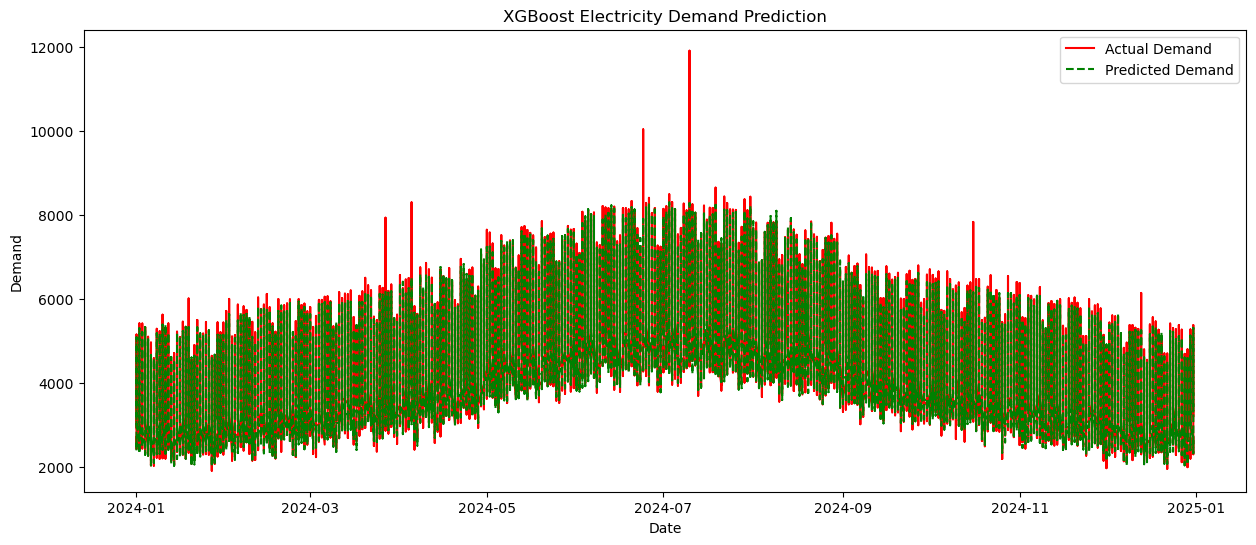

In [256]:
# Visualize the Predictions

plt.figure(figsize = (15,6))
plt.plot (Y_test.index, Y_test, label = 'Actual Demand', color= 'Red')
plt.plot (Y_test.index, predictions_xgb, label = 'Predicted Demand', color = 'Green', linestyle='--')
plt.title('XGBoost Electricity Demand Prediction')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [257]:
# save the model 
import joblib
joblib.dump(model_xgb,'electricity_xgb_prediction_model.pkl')

['electricity_xgb_prediction_model.pkl']

In [258]:
# load and use:
loaded_model = joblib.load('electricity_xgb_prediction_model.pkl')

# future_prediction = loaded_model.predict(X_future)

In [259]:
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)